<a href="https://colab.research.google.com/github/DMittz/IrisDataAnalysis/blob/main/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported Libraries:

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Testing panda's pre-defined methods/functions:

In [3]:
df = pd.read_csv("Iris[1].csv")

In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


To find unique values in a column:

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

To check if it is a balanced data set:

In [9]:
df.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [10]:
df[['PetalWidthCm','PetalLengthCm']]

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


Seaborn:

In [4]:
sns.set_theme()

In [5]:
df = df.drop(['Id'],axis = 1)

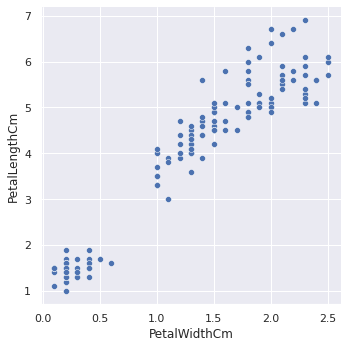

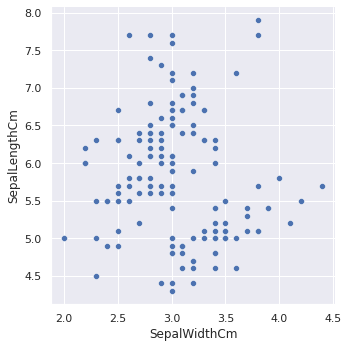

In [13]:
sns.relplot(data = df, x = "PetalWidthCm", y = "PetalLengthCm")
sns.relplot(data = df, x = "SepalWidthCm", y = "SepalLengthCm")

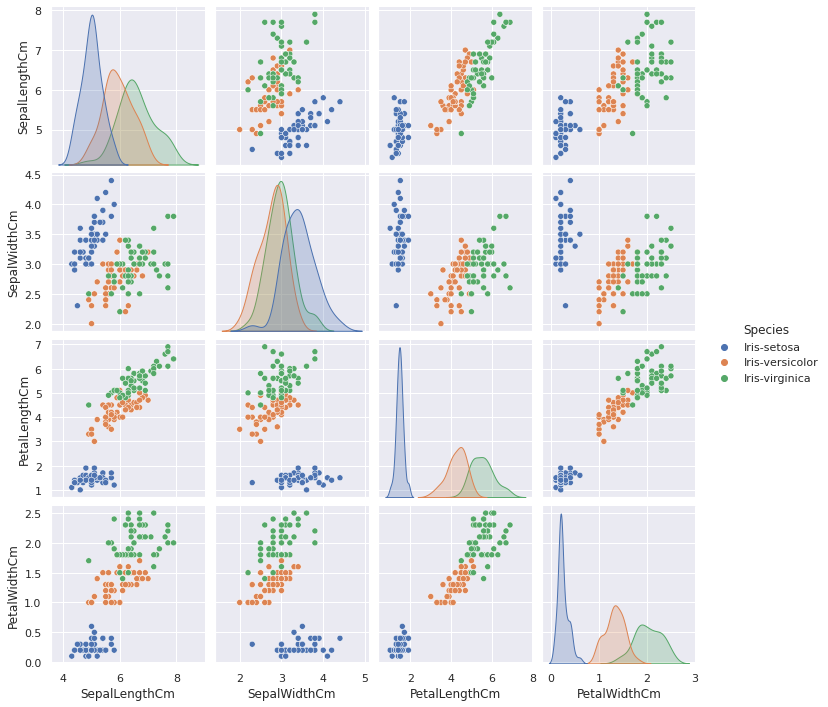

In [14]:
sns.pairplot(data = df, hue = 'Species')

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


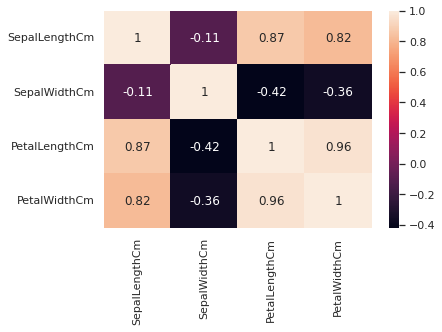

In [16]:
sns.heatmap(df.corr(), annot = True)

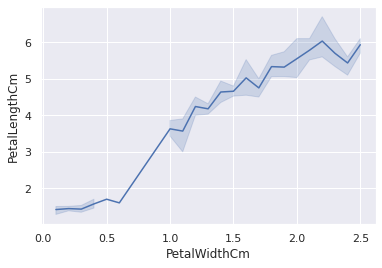

In [17]:
sns.lineplot(data = df, x='PetalWidthCm', y = 'PetalLengthCm')

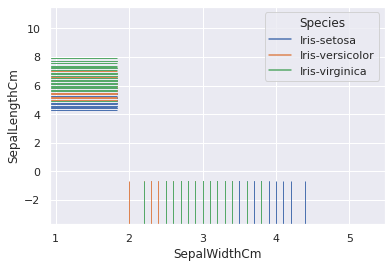

In [18]:
sns.rugplot(data = df, x = 'SepalWidthCm', y = 'SepalLengthCm', hue = 'Species', height = 0.2)

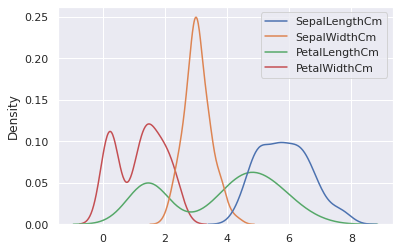

In [6]:
sns.kdeplot(data = df)

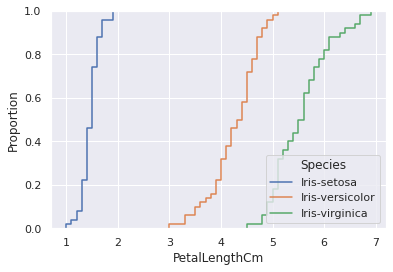

In [20]:
sns.ecdfplot(data = df, x = 'PetalLengthCm', hue = 'Species')

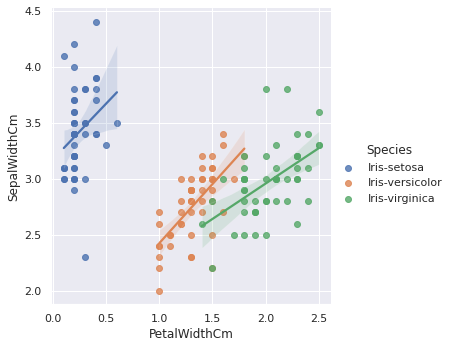

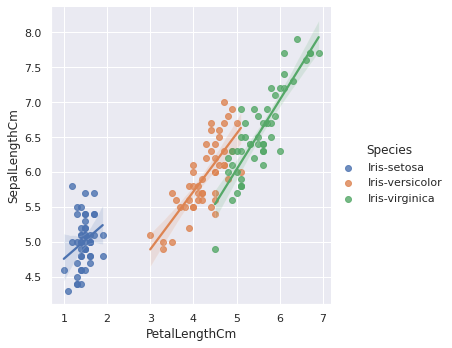

In [21]:
sns.lmplot(data = df, x = 'PetalWidthCm', y = 'SepalWidthCm', hue = 'Species')
sns.lmplot(data = df, x = 'PetalLengthCm', y = 'SepalLengthCm', hue = 'Species')

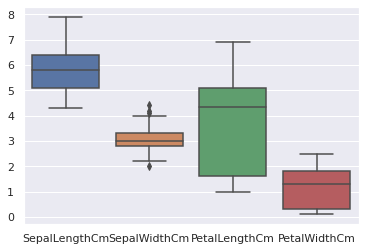

In [25]:
sns.boxplot(data = df)

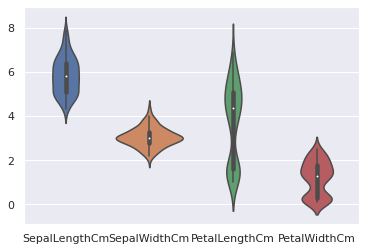

In [26]:
sns.violinplot(data = df)

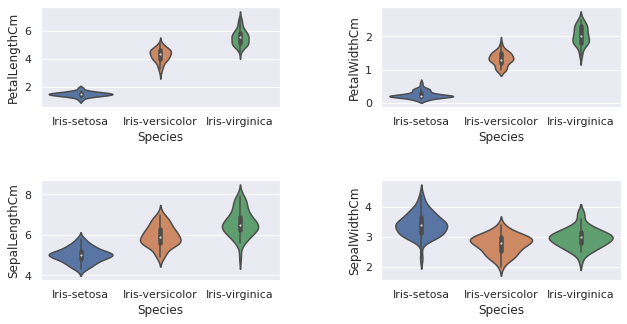

In [7]:
fig, axes = plt.subplots(2,2)
sns.violinplot(data = df, x ='Species', y = 'PetalLengthCm', ax = axes[0,0])
sns.violinplot(data = df, x ='Species', y = 'PetalWidthCm', ax = axes[0,1])
sns.violinplot(data = df, x ='Species', y = 'SepalLengthCm', ax = axes[1,0])
sns.violinplot(data = df, x ='Species', y = 'SepalWidthCm', ax = axes[1,1])
plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

Conclusion:
After plotting every column against every other column present in the data set, the scatterplots produced showed:
1.   There was a clear differentiation between flowers from Iris Setosa from flowers from the other 2 species. Flowers of Iris Setosa produced points on every scatterplot that were very distant to the points produced from the other 100 flowers. This made it easy to classify flowers as 'Iris Setosa' as they stood out on every scatterplot.
2.   Iris Versicolor and Iris Virginica produced points in very close proximity to each other which made it relatively harder to differentiate them through a quick glance. However, after looking precisely it was visible that flowers of Iris Versicolor densely cluster together leaving flowers of Iris Virginica to be sparsely scattered.



SK Learn:

In order to get the features (to convert it to an unlabeled data set), drop the labels and IDs.

In [11]:
features = df.drop(['Species'], axis = 1)

In [17]:
labels = df['Species']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.65, random_state = 42)

In [59]:
print(x_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
119            6.0           2.2            5.0           1.5
125            7.2           3.2            6.0           1.8
3              4.6           3.1            1.5           0.2
17             5.1           3.5            1.4           0.3
38             4.4           3.0            1.3           0.2
72             6.3           2.5            4.9           1.5
136            6.3           3.4            5.6           2.4
6              4.6           3.4            1.4           0.3
112            6.8           3.0            5.5           2.1
100            6.3           3.3            6.0           2.5
2              4.7           3.2            1.3           0.2
63             6.1           2.9            4.7           1.4
54             6.5           2.8            4.6           1.5
126            6.2           2.8            4.8           1.8
50             7.0           3.2            4.7           1.4
115     

In [62]:
print(y_train)

119     Iris-virginica
125     Iris-virginica
3          Iris-setosa
17         Iris-setosa
38         Iris-setosa
72     Iris-versicolor
136     Iris-virginica
6          Iris-setosa
112     Iris-virginica
100     Iris-virginica
2          Iris-setosa
63     Iris-versicolor
54     Iris-versicolor
126     Iris-virginica
50     Iris-versicolor
115     Iris-virginica
46         Iris-setosa
139     Iris-virginica
61     Iris-versicolor
147     Iris-virginica
79     Iris-versicolor
59     Iris-versicolor
91     Iris-versicolor
41         Iris-setosa
58     Iris-versicolor
90     Iris-versicolor
48         Iris-setosa
88     Iris-versicolor
107     Iris-virginica
124     Iris-virginica
21         Iris-setosa
57     Iris-versicolor
144     Iris-virginica
129     Iris-virginica
37         Iris-setosa
140     Iris-virginica
1          Iris-setosa
52     Iris-versicolor
130     Iris-virginica
103     Iris-virginica
99     Iris-versicolor
116     Iris-virginica
87     Iris-versicolor
74     Iris

In [63]:
print(x_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
18             5.7           3.8            1.7           0.3
118            7.7           2.6            6.9           2.3
78             6.0           2.9            4.5           1.5
76             6.8           2.8            4.8           1.4
..             ...           ...            ...           ...
134            6.1           2.6            5.6           1.4
135            7.7           3.0            6.1           2.3
89             5.5           2.5            4.0           1.3
8              4.4           2.9            1.4           0.2
13             4.3           3.0            1.1           0.1

[98 rows x 4 columns]


In [64]:
print(y_test)

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
            ...       
134     Iris-virginica
135     Iris-virginica
89     Iris-versicolor
8          Iris-setosa
13         Iris-setosa
Name: Species, Length: 98, dtype: object


In [65]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [66]:
dir(model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_pr

In [69]:
firsttest = x_test.iloc[['0']]

In [67]:
prediction = model.predict(x_test)

In [68]:
print(prediction)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica

In [70]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.94      0.95        32
 Iris-virginica       0.93      0.97      0.95        29

       accuracy                           0.97        98
      macro avg       0.97      0.97      0.97        98
   weighted avg       0.97      0.97      0.97        98

